In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import os
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

plt.style.use("../config/custom_plots.mplstyle")

```yaml
nAgents: 10000
nSteps: 1000000
nSaveSteps: 1000
nRuns: 10
networkP: 0.8
networkM: 10
additionalLinksFraction: 0.01
virtualLayer: true
epidemicLayer: true
comorbidities: false
qVoterParameters:
  p: 0.3
  q: 6
epidemicLayerParameters:
  beta: 0.9
  gamma: 0.5
  mu: 0.9
  kappa: 0.1
maxInfectedTimeMean: 10
maxInfectedTimeStd: 5
positiveOpinionFraction: 1.0
infectedFraction: 0.1
fractionIllnessA: 0.0
fractionIllnessB: 0.0
outputFolder: simulations/results_remove_links_parameters_beta_range
firstParameterRange:
  start: 0.0
  end: 1.0
  count: 51
  vals: null
  type: positiveOpinionFraction
secondParameterRange:
  start: 0.0
  end: 1.0
  count: 21
  vals: null
  type: beta
linksRemoval: false
nQVoterPerStep: 1
```


In [2]:
%%time

def load_df(prefix, fracPos, beta, folder, p, nagents=10000, nsteps=1000000, nruns=10):
    dfs = []
    for n in range(nruns):
        path = f"../simulations/{folder}/{prefix}_NAGENTS={nagents}_NSTEPS={nsteps}_NETWORKP=0.8_FRAC_LINKS=0.01_FRAC_POS_OPINION={fracPos}_FRAC_A=0.0_FRAC_B=0.0_FRAC_INFECTED=0.1_QVOTER=p={p}_q=6_EPIDEMIC=beta={beta}_gamma=0.50_mu=0.90_kappa=0.10_I_TIME_MEAN=10.0_I_TIME_STD=5.0_NRUN={n}.tsv"
        df = pd.read_csv(path, sep="\t")
        dfs.append(df)
    dfs1 = pd.DataFrame(np.array([x.to_numpy() for x in dfs]).mean(axis=0),
                        index=df.index, 
                        columns=df.columns)
    return dfs1


fPs = ['{:.2f}'.format(x / 100) for x in list(range(101))[::2]]

new_fPs = []
for idx, fP in enumerate(fPs):
    if idx % 5 == 0:
        new_fPs.append('{:.1f}'.format(float(fP)))
    else:
        new_fPs.append(fP)

betas = ['{:.2f}'.format(x / 100) for x in list(range(5, 101))[::5]]

on_large_p = {}
on_small_p = {}

off_large_p = {}
off_small_p = {}

for beta in tqdm(betas):
    off_large_p_per_beta = []
    on_large_p_per_beta = []
    off_small_p_per_beta = []
    on_small_p_per_beta = []
    
    for f in tqdm(new_fPs):
        df1 = load_df('off', f, beta, 'results_remove_links_parameters_beta_range', '0.30')
        df2 = load_df('on', f, beta, 'results_remove_links_parameters_beta_range', '0.30')
        df3 = load_df('off', f, beta, 'results_remove_links_parameters_beta_range_small_p', '0.01')
        df4 = load_df('on', f, beta, 'results_remove_links_parameters_beta_range_small_p', '0.01')
        off_large_p_per_beta.append(df1)
        on_large_p_per_beta.append(df2)
        off_small_p_per_beta.append(df3)
        on_small_p_per_beta.append(df4)
        
    off_large_p[beta] = off_large_p_per_beta
    on_large_p[beta] = on_large_p_per_beta
    off_small_p[beta] = off_small_p_per_beta
    on_small_p[beta] = on_small_p_per_beta

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

  0%|          | 0/51 [00:00<?, ?it/s]

CPU times: user 5min 8s, sys: 5.43 s, total: 5min 13s
Wall time: 5min 16s


In [3]:
def time_max_infected(dfs):
    times = []
    for df in dfs:
        t = df[df['infectedRate'] == df['infectedRate'].max()].step.to_numpy()[0]
        times.append(t)
    return np.array(times)
    
def max_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].max()
        val.append(i)
    return np.array(val)

def last_by_columns(dfs, column):
    val = []
    for df in dfs:
        i = df[column].to_numpy()[-1]
        val.append(i)
    return np.array(val)


def time_to_no_susceptible(dfs):
    val = []
    for df in dfs:
        i = df[df['susceptibleRate'] < 1e-2].step.values
        if len(i) >= 1:
            val.append(i[0])
        else:
            val.append(0)
    return val

In [4]:
colormap = plt.cm.get_cmap('viridis_r', 2*len(betas))
colors = [colormap(i) for i in range(2*len(betas))]

x = [float(x) for x in new_fPs] 


def plot_all_vals(ys, fun, ylabel, betas, ncol=1):
    i, j = 0, 0
    for y in ys:
        plt.plot(x, fun(y[0]), label=r'with, $\beta={}$'.format(betas[j]), color=colors[i])
        plt.plot(x, fun(y[1]), label=r'without, $\beta={}$'.format(betas[j]), color=colors[i+1])
        i += 2
        j += 1
    plt.legend(loc=(1.01, 0.05), ncol=ncol)
    plt.xlabel('positive opinion fraction')
    plt.ylabel(ylabel)    

### Kiedy nastąpi pik zachorowań w funkcji początkowej opinii agentów?

Legenda:

- `with`: z włączoną funkcją usuwania linków
- `without`: z wyłączoną funkcją usuwania linków

Text(0.5, 1.0, 'p=0.3')

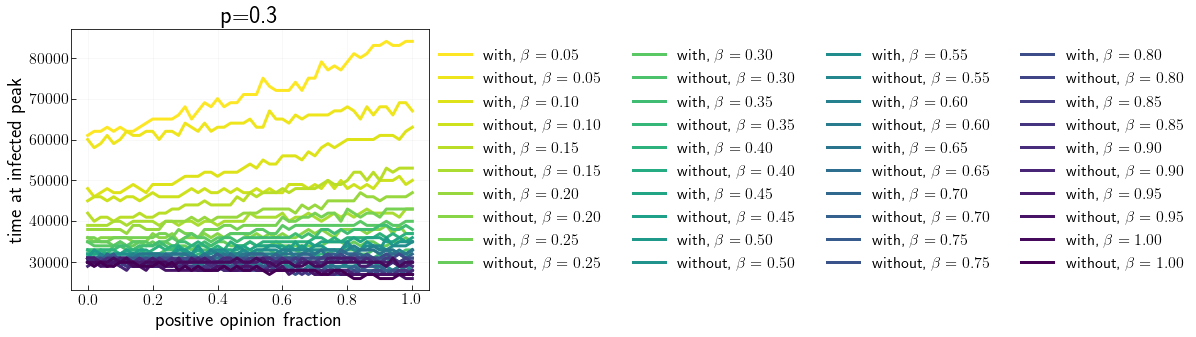

In [5]:
ys1 = list(zip(list(on_large_p.values()), list(off_large_p.values())))
ys2 = list(zip(list(on_small_p.values()), list(off_small_p.values())))


plot_all_vals(ys1, time_max_infected, 'time at infected peak', betas, ncol=4)
plt.title('p=0.3')

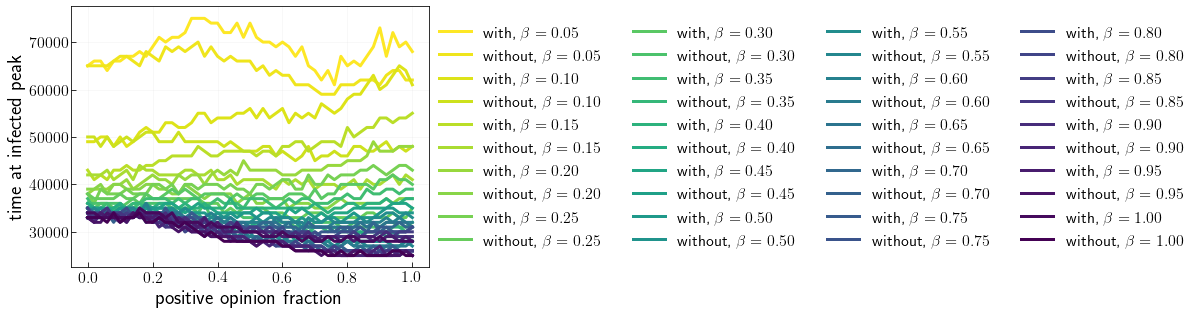

In [20]:
plot_all_vals(ys2, time_max_infected, 'time at infected peak', betas, ncol=4)
# plt.title('p=0.01')

# plt.savefig("../plots/results_remove_links_qvoter_time_small_p.pdf", bbox_inches='tight')

Dla mniejszej wartości `p` przebiegi nie są już takie monotoniczne (rosnące). Dla większych wartości $\beta$ czas w którym nastąpi pik zachorowań widocznie się skraca. Natomiast dla mniejszych $\beta$ nie mamy jednoznacznych przebiegów. Dla najmniejszej analizowanej wartości $\beta=0.05$ mamy pewne maksimum dla około 0.4 (początkowej pozytywnej opinii). Przy nieco większej wartości $\beta$ mamy przebiegi rosnące (tak jak w przypadku większych wartości `p`).  

### Wysokość piku zachorowań w zależności od początkowej opinii

Przy mniejszej wartości parametru `p` nie obserwujemy liniowej zależności między maksymalnym odsetkiem zarażonych a odestkiem agentów o pozytywnej opinii. Różnica pomiędzy normalnym modelem, a wariantem z ograniczeniem (usuwaniem) kontaktów jest widoczna przy 0.2-0.3. Poniżej nie ma znacznej różnica pomiędzy modelami. 


Może być to spowodowane tym, że w układzie dla początkowej opinii <0.2 mamy bardzo dużo agentów o negatywnej opinii i usuwanie linków nic nie zmieni. Wydaję mi się, że wynika to z czasu byci w stanie infected. Negatywni agenci muszą spędzać dłuższy czas niż osoby o pozytywnej opinii.


Duża różnica w pikach powstaje, kiedy wszyscy agenci mają pozytywną opinię, wtedy $\beta = \beta / 2$ (patrz poniżej) oraz jest skrócony czas w stanie infected. Przez to usuwanie linków może spowodować, że ci chorzy agenci przejdą do kolejnych stanów i w rezultacie mamy pik o znacznie mniejszej wartości.


Prawdopodobnie wyniki uległy by zmianie, kiedy zmodyfikowano by maksymalny czas w stanie infected oraz osobisty czas (średnią i odchylenie) dla każdego agenta.


Dla przypomnienia w układzie agent z pozytywą opinią:

- $\beta_p = \beta / 2$ 
- czas trwania jego infekcji jest dwukrotnie skrócony

Text(0.5, 1.0, 'p=0.3')

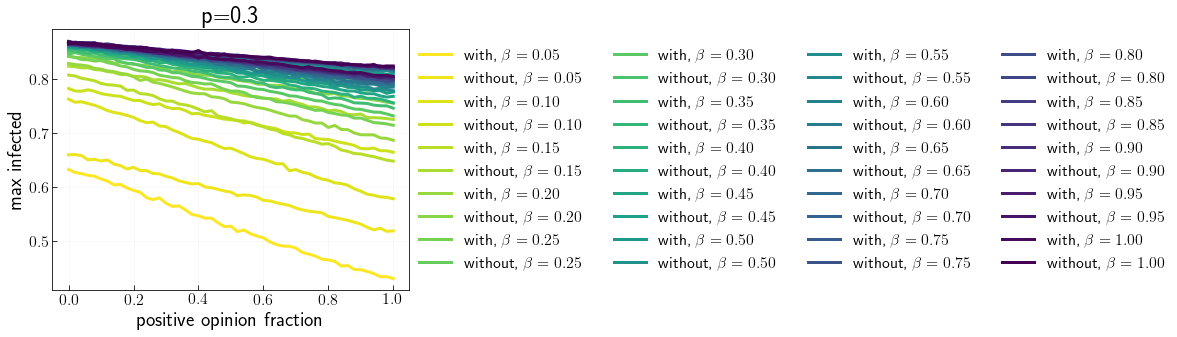

In [7]:
plot_all_vals(ys1, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=4)
plt.title('p=0.3')

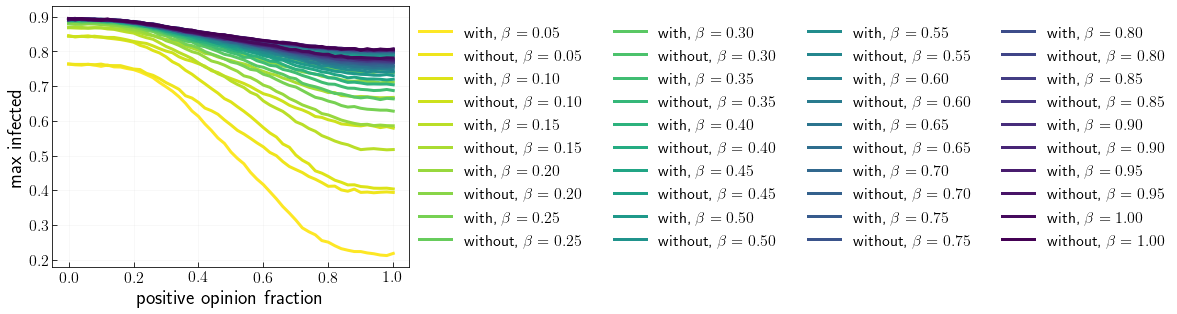

In [21]:
plot_all_vals(ys2, lambda x: max_by_columns(x, 'infectedRate'), 'max infected', betas, ncol=4)
# plt.title('p=0.01')
# plt.savefig("../plots/results_remove_links_qvoter_infected_small_p.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'p=0.3')

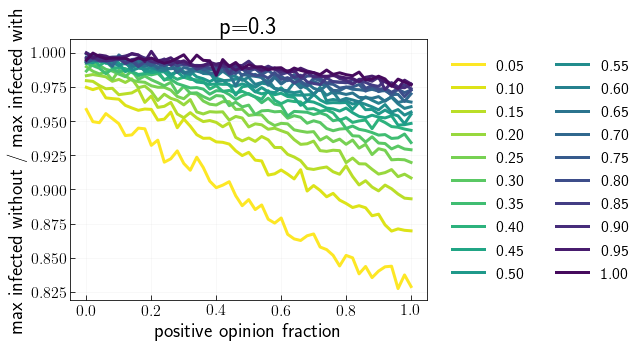

In [9]:
fraction_with_without_max_infected = []

fun = lambda x: max_by_columns(x, 'infectedRate')

for i in range(len(ys1)):
    y1 = ys1[i][0]
    y2 = ys1[i][1]
    y12 = fun(y1) / fun(y2)
    fraction_with_without_max_infected.append(y12)
    plt.plot(x, y12, color=colors[2*i], label=betas[i])

plt.ylabel('max infected without / max infected with')
plt.legend(loc=(1.05, 0.05), ncol=2)
plt.xlabel('positive opinion fraction')
plt.title('p=0.3')

Text(0.5, 1.0, 'p=0.01')

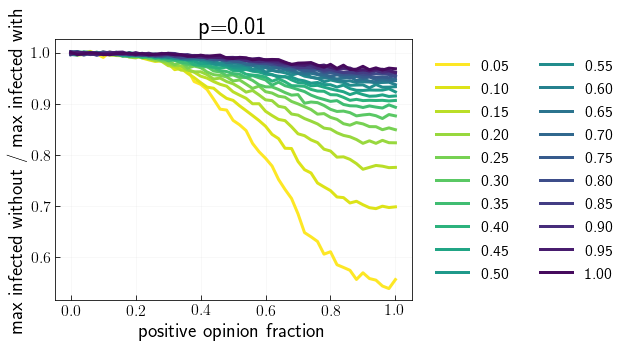

In [10]:
fraction_with_without_max_infected_no_virtual = []

fun = lambda x: max_by_columns(x, 'infectedRate')

for i in range(len(ys2)):
    y1 = ys2[i][0]
    y2 = ys2[i][1]
    y12 = fun(y1) / fun(y2)
    fraction_with_without_max_infected_no_virtual.append(y12)
    plt.plot(x, y12, color=colors[2*i], label=betas[i])

plt.ylabel('max infected without / max infected with')
plt.legend(loc=(1.05, 0.05), ncol=2)
plt.xlabel('positive opinion fraction')
plt.title('p=0.01')

Jak można powyżej zaabserwować nie mamy już liniowego charakteru stosunków tych dwóch przebiegów. Regresję liniową wykonałem dopiero od wartości 0.25, choć ta relacja nie jest liniowa.

In [11]:
from scipy import stats

def get_slope(y, x=x):
    slope, intercept, _, _, _ = stats.linregress(x, y)
    return slope    

Jeżeli agenci nie działają niezależnie (małe `p`) to wpływ usuwania linków jest bardziej widoczny, tzn. nachylenie prostej jest większe. Trzeba tu podkreślić, że spadek stosunku pików pojawia się dopiero od pewnej wartości początkowej agentów

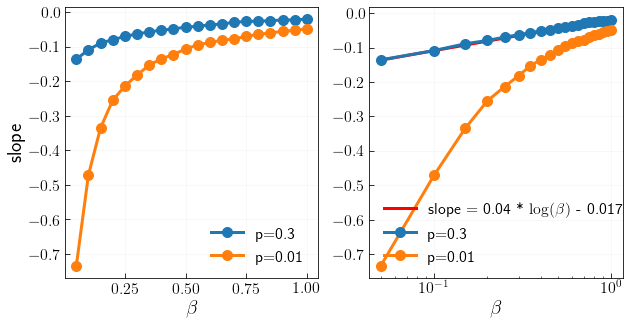

In [12]:
slopes = [get_slope(y) for y in fraction_with_without_max_infected]
slopes_no_virtual = [get_slope(y[15:], x[15:]) for y in fraction_with_without_max_infected_no_virtual]

betas_float = [float(b) for b in betas]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(betas_float, slopes, 'o-', label='p=0.3')
plt.plot(betas_float, slopes_no_virtual, 'o-', label='p=0.01')
plt.legend()

plt.ylabel('slope')
plt.xlabel(r'$\beta$')

plt.subplot(1, 2, 2)
z = np.linspace(0.05, 1, num=100)
plt.plot(z, 0.04 * np.log(z) - 0.017, color='red', label=r'slope = 0.04 * $\log(\beta)$ - 0.017')
plt.xscale('log')

plt.plot(betas_float, slopes, 'o-', label='p=0.3')
plt.plot(betas_float, slopes_no_virtual, 'o-', label='p=0.01')
plt.legend()
plt.xlabel(r'$\beta$')
plt.xscale('log')

Tutaj raczej nie wyciągałbym większych wniosków, bo samo dopasowanie daje wiele do życzenia (tzn. wykres powyżej). Może lepiej wykonać dopasowanie wielomianem wyższego rzędu, jeszcze nie wiem w jaki sposób to analizować

### Ostateczna wartość osób wyzdrowiałych

W przypadku niskich wartości $\beta$ mamy mniej osób wyzdrowiałych. Natomiast to się łączy z tym, że w społeczeństwie pozostaje część osób, które wogóle nie zachorowały.

Text(0.5, 1.0, 'p=0.3')

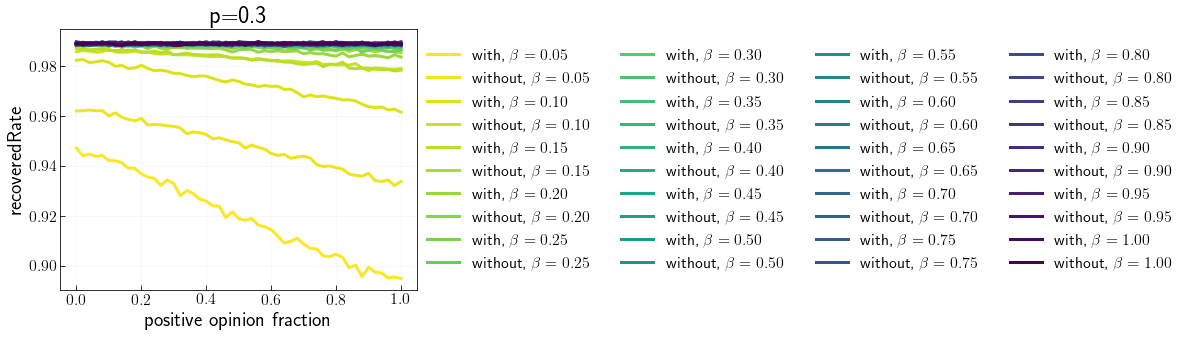

In [13]:
plot_all_vals(ys1, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=4)
plt.title('p=0.3')

Text(0.5, 1.0, 'p=0.01')

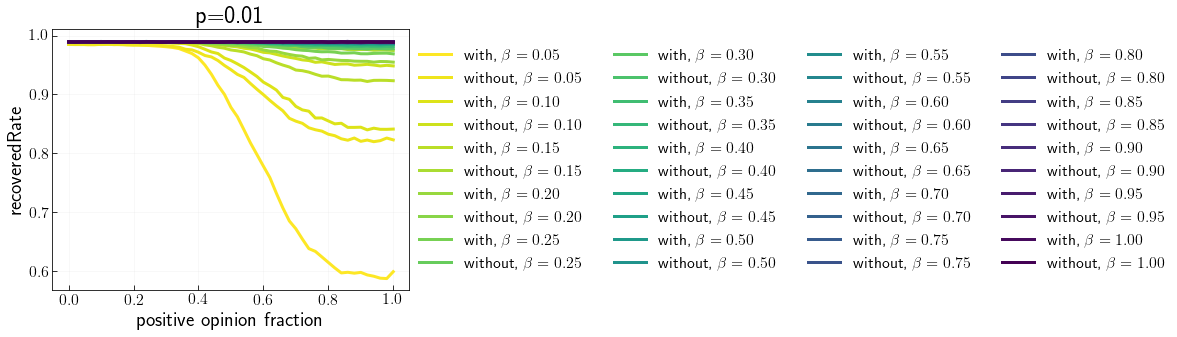

In [14]:
plot_all_vals(ys2, lambda x: last_by_columns(x, 'recoveredRate'), 'recoveredRate', betas, ncol=4)
plt.title('p=0.01')

Tutaj ponownie widzimy, że dla `p=0.01` mamy pewien punkt "graniczny" dla którego recovered rate spada.

Text(0.5, 1.0, 'p=0.3')

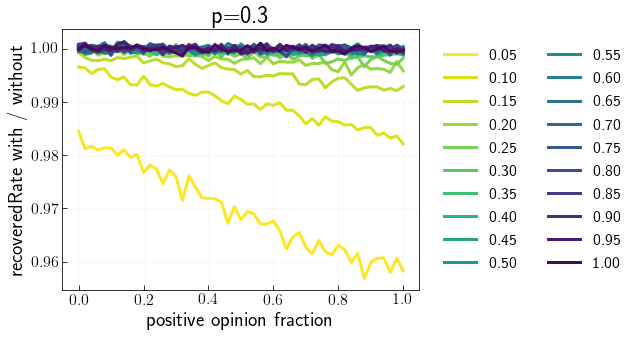

In [15]:
fun = lambda x: last_by_columns(x, 'recoveredRate')

tmp1 = []
for i in range(len(ys1)):
    y1 = ys1[i][0]
    y2 = ys1[i][1]
    y12 = fun(y1) / fun(y2)
    tmp1.append(y12)
    plt.plot(x, y12, color=colors[2*i], label=betas[i])

plt.legend(loc=(1.05, 0.05), ncol=2)
plt.ylabel('recoveredRate with / without')
plt.xlabel('positive opinion fraction')
plt.title('p=0.3')

Text(0.5, 1.0, 'p=0.01')

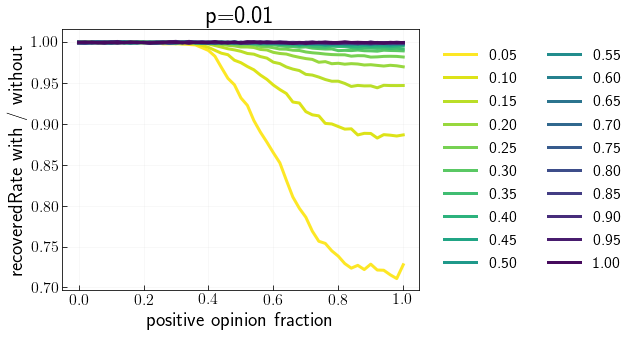

In [16]:
fun = lambda x: last_by_columns(x, 'recoveredRate')

tmp2 = []
for i in range(len(ys2)):
    y1 = ys2[i][0]
    y2 = ys2[i][1]
    y12 = fun(y1) / fun(y2)
    tmp2.append(y12)
    plt.plot(x, y12, color=colors[2*i], label=betas[i])

plt.legend(loc=(1.05, 0.05), ncol=2)
plt.ylabel('recoveredRate with / without')
plt.xlabel('positive opinion fraction')
plt.title('p=0.01')

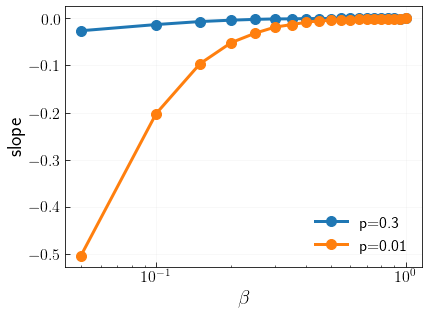

In [17]:
slopes = [get_slope(y) for y in tmp1]
slopes_no_virtual = [get_slope(y[15:], x[15:]) for y in tmp2]


plt.plot(betas_float, slopes, 'o-', label='p=0.3')
plt.plot(betas_float, slopes_no_virtual, 'o-', label='p=0.01')
plt.ylabel('slope')
plt.xlabel(r'$\beta$')
plt.xscale('log')
plt.legend()

Tutaj również dopasowanie może dawać wiele do życzenia.

### Pierwszy czas po którym w społeczeństwie będzie mniej niż 1% osób podatnych

Wartość zero na poniższym wykresie oznacza to, że nigdy nie dojdzie do sytuacji, że będzie mniej niż 1% osób podatnych. Czyli po prostu zostanie część osób podatnych.

Text(0.5, 1.0, 'p=0.3')

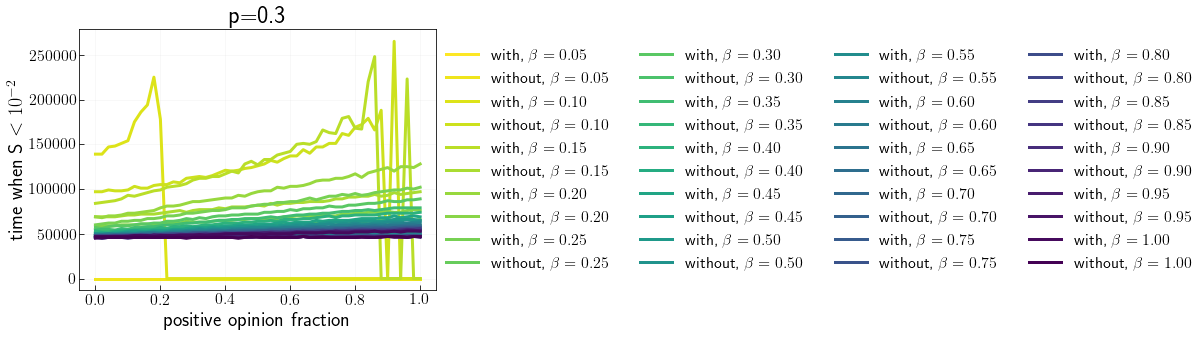

In [18]:
plot_all_vals(ys1, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=4)
plt.title('p=0.3')

Text(0.5, 1.0, 'p=0.01')

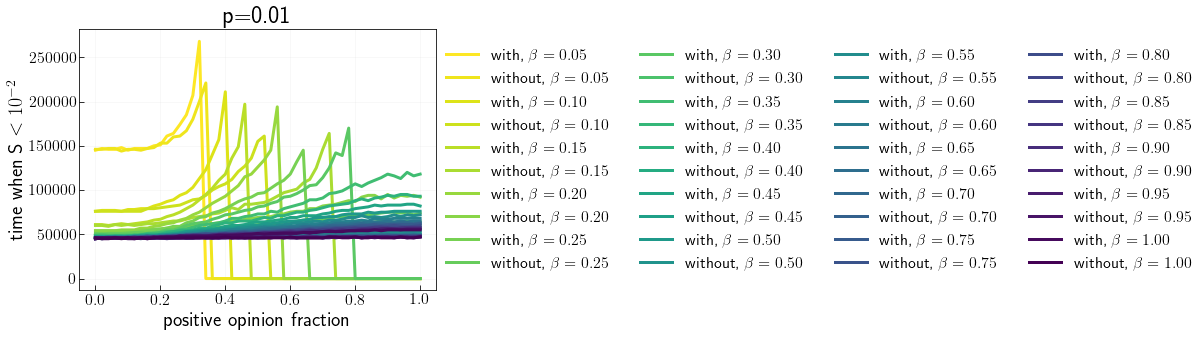

In [19]:
plot_all_vals(ys2, time_to_no_susceptible, r'time when S $< 10^{-2}$', betas, ncol=4)
plt.title('p=0.01')

Dla `p=0.01` dla większych wartości $\beta$ wogóle w układzie pozostanie mniej niż 1% osób podatnych. 